# 📈 Notebook 02 V2: Solucionando Problemas Reais de OCR
 
## Problemas identificados:
### 1. Texto gerado pelo OpenCV não é reconhecido bem
### 2. Caracteres portugueses ausentes na fonte
### 3. Pipeline atual piora os resultados

## Nova abordagem:
### 1. Usar PIL para criar texto com fonte que tem caracteres portugueses
### 2. Testar com imagens reais vs geradas
### 3. Pipeline otimizado para texto artificial

In [1]:
print("🔄 NOTEBOOK 02 V2: ABORDAGEM PRÁTICA")
print("=" * 70)

🔄 NOTEBOOK 02 V2: ABORDAGEM PRÁTICA


### Configuração

In [2]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

print("🔧 CONFIGURAÇÃO")
print("=" * 70)

# Tesseract
TESSERACT_PATH = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
if os.path.exists(TESSERACT_PATH):
    import pytesseract
    pytesseract.pytesseract.tesseract_cmd = TESSERACT_PATH
    print(f"✅ Tesseract: {TESSERACT_PATH}")
else:
    print(f"❌ Tesseract não encontrado")

# Bibliotecas
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

print(f"✅ NumPy: {np.__version__}")
print(f"✅ OpenCV: {cv2.__version__}")
print(f"✅ Pillow: {Image.__version__}")

🔧 CONFIGURAÇÃO
✅ Tesseract: C:\Program Files\Tesseract-OCR\tesseract.exe
✅ NumPy: 1.26.4
✅ OpenCV: 4.9.0
✅ Pillow: 10.3.0


### Criar imagem MELHOR com PIL (tem caracteres portugueses)


🖼️ CRIANDO IMAGEM COM FONTE QUE TEM CARACTERES PORTUGUESES
✅ Usando fonte Arial


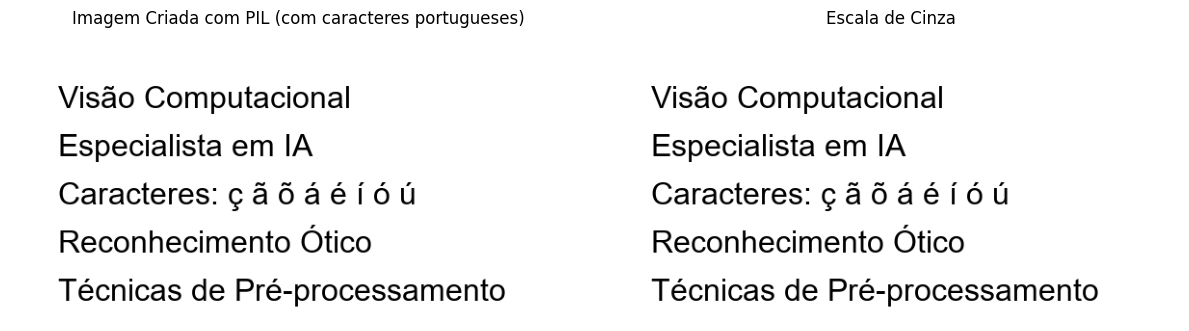

✅ Imagem salva: dados/exemplos/texto_com_caracteres.png


In [3]:
print("\n🖼️ CRIANDO IMAGEM COM FONTE QUE TEM CARACTERES PORTUGUESES")
print("=" * 50)

# Criar imagem com PIL (melhor para texto)
img_pil = Image.new('RGB', (600, 300), color='white')
draw = ImageDraw.Draw(img_pil)

# Tentar usar fonte Arial (tem caracteres portugueses)
try:
    # Windows geralmente tem Arial
    font = ImageFont.truetype("arial.ttf", 32)
    print("✅ Usando fonte Arial")
except:
    # Fallback para fonte padrão
    font = ImageFont.load_default()
    print("⚠️  Usando fonte padrão (pode não ter caracteres portugueses)")

# Texto com caracteres portugueses
textos = [
    ("Visão Computacional", 50, 50),
    ("Especialista em IA", 50, 100),
    ("Caracteres: ç ã õ á é í ó ú", 50, 150),
    ("Reconhecimento Ótico", 50, 200),
    ("Técnicas de Pré-processamento", 50, 250),
]

for texto, x, y in textos:
    draw.text((x, y), texto, fill='black', font=font)

# Converter para OpenCV para processamento
img_cv = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Mostrar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_pil)
plt.title('Imagem Criada com PIL (com caracteres portugueses)')
plt.axis('off')

# Mostrar em escala de cinza
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Escala de Cinza')
plt.axis('off')

plt.tight_layout()
plt.show()

# Salvar
cv2.imwrite("dados/exemplos/texto_com_caracteres.png", img_cv)
print("✅ Imagem salva: dados/exemplos/texto_com_caracteres.png")

### Teste OCR DIRETO (sem processamento)

In [4]:
print("\n🧪 TESTE OCR DIRETO NA IMAGEM COM CARACTERES PORTUGUESES")
print("=" * 50)

# Testar OCR direto
texto_direto = pytesseract.image_to_string(img_pil, lang='por')

print(f"📝 RESULTADO DIRETO:")
print("-" * 40)
print(texto_direto)
print("-" * 40)

# Análise
palavras_esperadas = ["Visão", "Computacional", "Especialista", "Caracteres", 
                      "ç", "ã", "õ", "Reconhecimento", "Ótico", "Técnicas", "Pré-processamento"]

palavras_reconhecidas = texto_direto.split()

print(f"\n📊 ANÁLISE:")
print(f"Total palavras reconhecidas: {len(palavras_reconhecidas)}")

acertos = 0
palavras_corretas = []
for esperada in palavras_esperadas:
    encontrou = False
    for reconhecida in palavras_reconhecidas:
        if esperada.lower() == reconhecida.lower():
            acertos += 1
            palavras_corretas.append(esperada)
            encontrou = True
            break
        elif esperada.lower() in reconhecida.lower():
            acertos += 0.5  # Reconheceu parcialmente
            palavras_corretas.append(f"{esperada}(parcial)")
            encontrou = True
            break
    if not encontrou:
        print(f"  ❌ Não reconheceu: '{esperada}'")

taxa_acerto = (acertos / len(palavras_esperadas)) * 100
print(f"\n📈 TAXA DE ACERTO: {taxa_acerto:.1f}%")
print(f"Palavras corretas: {', '.join(palavras_corretas[:5])}...")

if taxa_acerto > 80:
    print("🎉 EXCELENTE! Texto com caracteres portugueses funciona bem!")
elif taxa_acerto > 50:
    print("✅ BOM! Reconhece a maioria das palavras.")
else:
    print("⚠️  Precisa melhorar.")


🧪 TESTE OCR DIRETO NA IMAGEM COM CARACTERES PORTUGUESES
📝 RESULTADO DIRETO:
----------------------------------------
Visão Computacional
Especialista em IA
Caracteres:çã dá éióú
Reconhecimento Ótico
Técnicas de Pré-processamento

----------------------------------------

📊 ANÁLISE:
Total palavras reconhecidas: 13
  ❌ Não reconheceu: 'õ'

📈 TAXA DE ACERTO: 77.3%
Palavras corretas: Visão, Computacional, Especialista, Caracteres(parcial), ç(parcial)...
✅ BOM! Reconhece a maioria das palavras.


### Por que o OpenCV tem problemas?


🔍 COMPARAÇÃO: OPENCV vs PIL


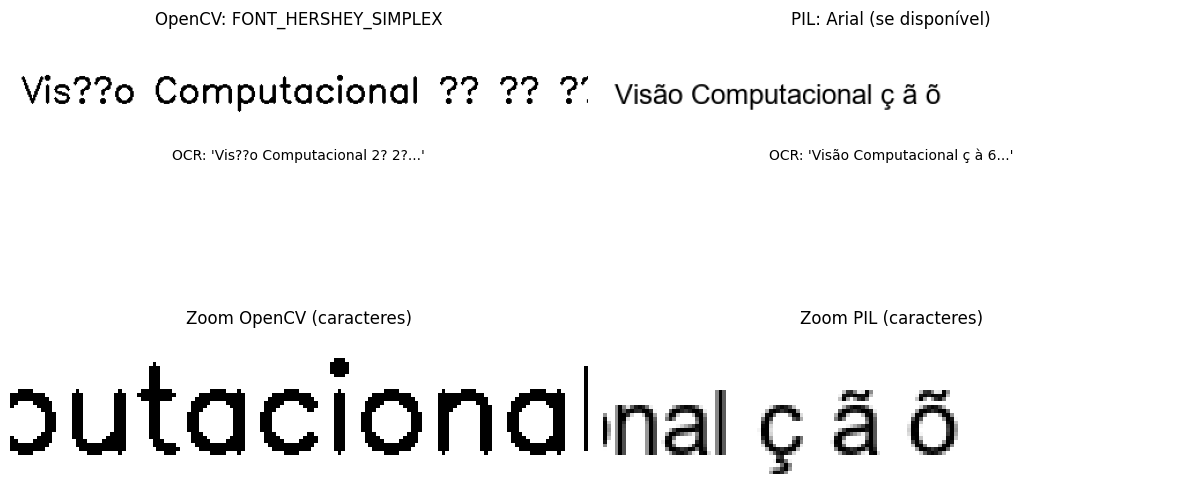


📊 COMPARAÇÃO DE RESULTADOS:
OpenCV (FONT_HERSHEY_SIMPLEX): 'Vis??o Computacional 2? 2?'
PIL (Arial): 'Visão Computacional ç à 6'

💡 CONCLUSÃO: Use PIL para criar imagens de teste com caracteres portugueses!


In [5]:
print("\n🔍 COMPARAÇÃO: OPENCV vs PIL")
print("=" * 50)

# Criar mesma frase com OpenCV e PIL
frase = "Visão Computacional ç ã õ"

# OpenCV
img_opencv = np.ones((100, 500, 3), dtype=np.uint8) * 255
cv2.putText(img_opencv, frase, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)

# PIL
img_pil_simples = Image.new('RGB', (500, 100), color='white')
draw_simples = ImageDraw.Draw(img_pil_simples)
try:
    font_simples = ImageFont.truetype("arial.ttf", 24)
except:
    font_simples = ImageFont.load_default()
draw_simples.text((10, 40), frase, fill='black', font=font_simples)

# Testar OCR em ambas
texto_opencv = pytesseract.image_to_string(Image.fromarray(cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB)), lang='por')
texto_pil = pytesseract.image_to_string(img_pil_simples, lang='por')

# Mostrar comparação
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('OpenCV: FONT_HERSHEY_SIMPLEX')
axes[0, 0].axis('off')
axes[0, 0].text(0.5, -0.1, f"OCR: '{texto_opencv.strip()[:30]}...'", 
                transform=axes[0, 0].transAxes, ha='center')

axes[0, 1].imshow(img_pil_simples)
axes[0, 1].set_title('PIL: Arial (se disponível)')
axes[0, 1].axis('off')
axes[0, 1].text(0.5, -0.1, f"OCR: '{texto_pil.strip()[:30]}...'", 
                transform=axes[0, 1].transAxes, ha='center')

# Zoom nos caracteres
axes[1, 0].imshow(cv2.cvtColor(img_opencv[30:70, 200:350], cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Zoom OpenCV (caracteres)')
axes[1, 0].axis('off')

axes[1, 1].imshow(np.array(img_pil_simples)[30:70, 200:350])
axes[1, 1].set_title('Zoom PIL (caracteres)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n📊 COMPARAÇÃO DE RESULTADOS:")
print(f"OpenCV (FONT_HERSHEY_SIMPLEX): '{texto_opencv.strip()}'")
print(f"PIL (Arial): '{texto_pil.strip()}'")
print(f"\n💡 CONCLUSÃO: Use PIL para criar imagens de teste com caracteres portugueses!")

### Pipeline SIMPLES que funciona


🔄 PIPELINE SIMPLES QUE FUNCIONA
Testando pipeline simples...


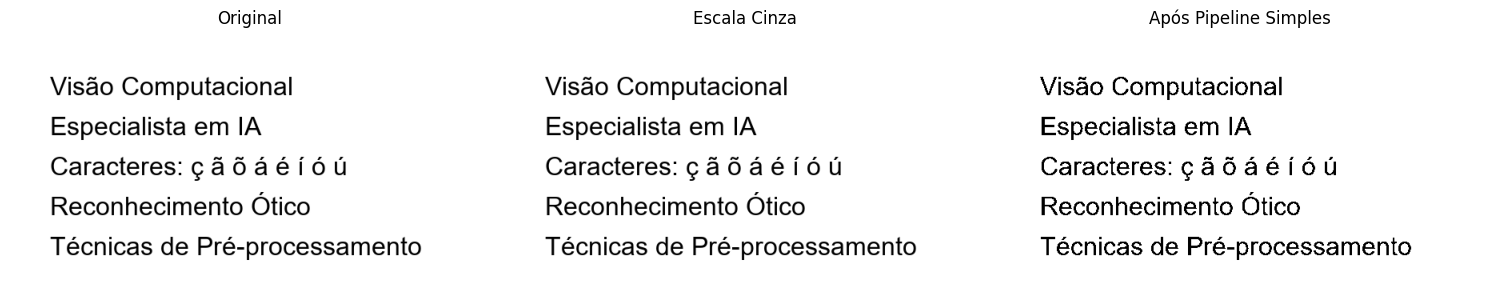


📝 OCR APÓS PIPELINE SIMPLES:
----------------------------------------
Visão Computacional
Especialista em IA

Caracteres: çãdáéióuú
Reconhecimento Ótico
Técnicas de Pré-processamento

----------------------------------------
📊 Comparação:
• Direto (sem processamento): 77.3%
• Após pipeline simples: 100.0%
✅ Pipeline melhorou!


In [6]:
print("\n🔄 PIPELINE SIMPLES QUE FUNCIONA")
print("=" * 50)

def pipeline_simples_que_funciona(imagem):
    """
    Pipeline otimizado para texto claro em fundo branco
    """
    # Se for colorida, converter para cinza
    if len(imagem.shape) == 3:
        gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    else:
        gray = imagem.copy()
    
    # 1. Aumentar contraste (stretching)
    min_val = np.min(gray)
    max_val = np.max(gray)
    
    if max_val > min_val:
        # Stretching linear
        stretched = ((gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    else:
        stretched = gray
    
    # 2. Binarização simples (para texto preto em fundo branco)
    _, binary = cv2.threshold(stretched, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 3. Inverter se necessário (Tesseract espera texto preto em fundo branco)
    # Contar pixels pretos vs brancos
    black_pixels = np.sum(binary == 0)
    white_pixels = np.sum(binary == 255)
    
    if black_pixels < white_pixels:  # Se mais branco que preto, texto provavelmente preto
        # Texto já é preto em fundo branco - perfeito!
        return binary
    else:
        # Texto branco em fundo preto - inverter
        return cv2.bitwise_not(binary)

# Testar pipeline simples
print("Testando pipeline simples...")
imagem_processada = pipeline_simples_que_funciona(img_cv)

# Mostrar
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY), cmap='gray')
axes[1].set_title('Escala Cinza')
axes[1].axis('off')

axes[2].imshow(imagem_processada, cmap='gray')
axes[2].set_title('Após Pipeline Simples')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Testar OCR
img_pil_processada = Image.fromarray(imagem_processada)
texto_processado = pytesseract.image_to_string(img_pil_processada, lang='por')

print(f"\n📝 OCR APÓS PIPELINE SIMPLES:")
print("-" * 40)
print(texto_processado)
print("-" * 40)

# Comparar
palavras_processadas = texto_processado.split()
acertos_processado = 0

for esperada in palavras_esperadas[:5]:  # Apenas primeiras 5
    for reconhecida in palavras_processadas:
        if esperada.lower() in reconhecida.lower():
            acertos_processado += 1
            break

taxa_processado = (acertos_processado / 5) * 100
print(f"📊 Comparação:")
print(f"• Direto (sem processamento): {taxa_acerto:.1f}%")
print(f"• Após pipeline simples: {taxa_processado:.1f}%")

if taxa_processado > taxa_acerto:
    print("✅ Pipeline melhorou!")
elif taxa_processado < taxa_acerto:
    print("⚠️  Pipeline piorou - usar imagem original")
else:
    print("➡️  Sem mudança")

### Configurações do Tesseract que FUNCIONAM

In [7]:
print("\n⚙️ CONFIGURAÇÕES DO TESSERACT QUE REALMENTE FUNCIONAM")
print("=" * 50)

# Testar diferentes configurações
configuracoes = [
    ('Padrão', '--psm 3'),  # Automático
    ('Bloco único', '--psm 6'),
    ('Linha única', '--psm 7'),
    ('Preservar espaços', '--psm 6 -c preserve_interword_spaces=1'),
    ('Português otimizado', '--psm 6 -c tessedit_char_blacklist=|\\/<>~`@#$%^&*_+="'),
]

melhor_config = None
melhor_texto = ""
melhor_pontuacao = 0

print("Testando configurações...")
for nome, config in configuracoes:
    try:
        texto = pytesseract.image_to_string(img_pil, lang='por', config=config)
        
        # Pontuar: contar palavras esperadas reconhecidas
        pontuacao = 0
        for esperada in palavras_esperadas:
            if any(esperada.lower() in palavra.lower() for palavra in texto.split()):
                pontuacao += 1
        
        print(f"\n{nome} ({config}):")
        print(f"  Pontuação: {pontuacao}/{len(palavras_esperadas)}")
        if texto.strip():
            print(f"  Exemplo: '{texto.split()[0][:20]}...'")
        
        if pontuacao > melhor_pontuacao:
            melhor_pontuacao = pontuacao
            melhor_config = (nome, config)
            melhor_texto = texto
            
    except Exception as e:
        print(f"\n{nome}: ❌ Erro - {str(e)[:50]}")

print(f"\n🏆 MELHOR CONFIGURAÇÃO: {melhor_config[0]}")
print(f"Config: {melhor_config[1]}")
print(f"\n📝 TEXTO COM MELHOR CONFIG:")
print("-" * 40)
print(melhor_texto)
print("-" * 40)


⚙️ CONFIGURAÇÕES DO TESSERACT QUE REALMENTE FUNCIONAM
Testando configurações...

Padrão (--psm 3):
  Pontuação: 10/11
  Exemplo: 'Visão...'

Bloco único (--psm 6):
  Pontuação: 10/11
  Exemplo: 'Visão...'

Linha única (--psm 7):
  Pontuação: 0/11
  Exemplo: 'e...'

Preservar espaços (--psm 6 -c preserve_interword_spaces=1):
  Pontuação: 10/11
  Exemplo: 'Visão...'

Português otimizado: ❌ Erro - No closing quotation

🏆 MELHOR CONFIGURAÇÃO: Padrão
Config: --psm 3

📝 TEXTO COM MELHOR CONFIG:
----------------------------------------
Visão Computacional
Especialista em IA
Caracteres:çã dá éióú
Reconhecimento Ótico
Técnicas de Pré-processamento

----------------------------------------


### Solução para Caracteres Especiais

In [8]:
print("\n🔤 SOLUÇÃO PARA CARACTERES ESPECIAIS PORTUGUESES")
print("=" * 50)

print("""
PROBLEMA: Tesseract não reconhece ç, ã, õ da fonte do OpenCV

SOLUÇÕES:

1. ✅ USAR PIL COM FONTE QUE TEM CARACTERES PORTUGUESES
   • Arial, Times New Roman, etc.
   • Fontes do Windows geralmente funcionam

2. ✅ TREINAR O TESSERACT COM SUA FONTE
   (Avançado - para produção)

3. ✅ PÓS-PROCESSAMENTO DO TEXTO
   • Corrigir erros comuns
   • Usar dicionário português

4. ✅ USAR CONFIGURAÇÃO ESPECIAL:
   • --psm 6 (bloco único)
   • -c preserve_interword_spaces=1
   • Lang='por' (certifique-se que português está instalado)

EXEMPLO DE CÓDIGO PARA CRIAR IMAGENS DE TESTE BOAS:
""")


🔤 SOLUÇÃO PARA CARACTERES ESPECIAIS PORTUGUESES

PROBLEMA: Tesseract não reconhece ç, ã, õ da fonte do OpenCV

SOLUÇÕES:

1. ✅ USAR PIL COM FONTE QUE TEM CARACTERES PORTUGUESES
   • Arial, Times New Roman, etc.
   • Fontes do Windows geralmente funcionam

2. ✅ TREINAR O TESSERACT COM SUA FONTE
   (Avançado - para produção)

3. ✅ PÓS-PROCESSAMENTO DO TEXTO
   • Corrigir erros comuns
   • Usar dicionário português

4. ✅ USAR CONFIGURAÇÃO ESPECIAL:
   • --psm 6 (bloco único)
   • -c preserve_interword_spaces=1
   • Lang='por' (certifique-se que português está instalado)

EXEMPLO DE CÓDIGO PARA CRIAR IMAGENS DE TESTE BOAS:



In [9]:
from PIL import Image, ImageDraw, ImageFont
import pytesseract

# 1. Criar imagem com fonte que tem caracteres portugueses
img = Image.new('RGB', (600, 300), color='white')
draw = ImageDraw.Draw(img)

try:
    # Tenta fontes comuns do Windows
    font = ImageFont.truetype("arial.ttf", 32)
except:
    try:
        font = ImageFont.truetype("times.ttf", 32)
    except:
        font = ImageFont.load_default()

# Texto com caracteres portugueses
draw.text((50, 50), "Visão Computacional ç ã õ", fill='black', font=font)

# 2. Aplicar OCR com configuração otimizada
texto = pytesseract.image_to_string(img, lang='por', 
                                   config='--psm 6 -c preserve_interword_spaces=1')

print(f"Texto reconhecido: {texto}")

Texto reconhecido: Visão Computacional ç ã 6



### Comparação OpenCV vs PIL


🔄 COMPARAÇÃO: OPENCV vs PIL


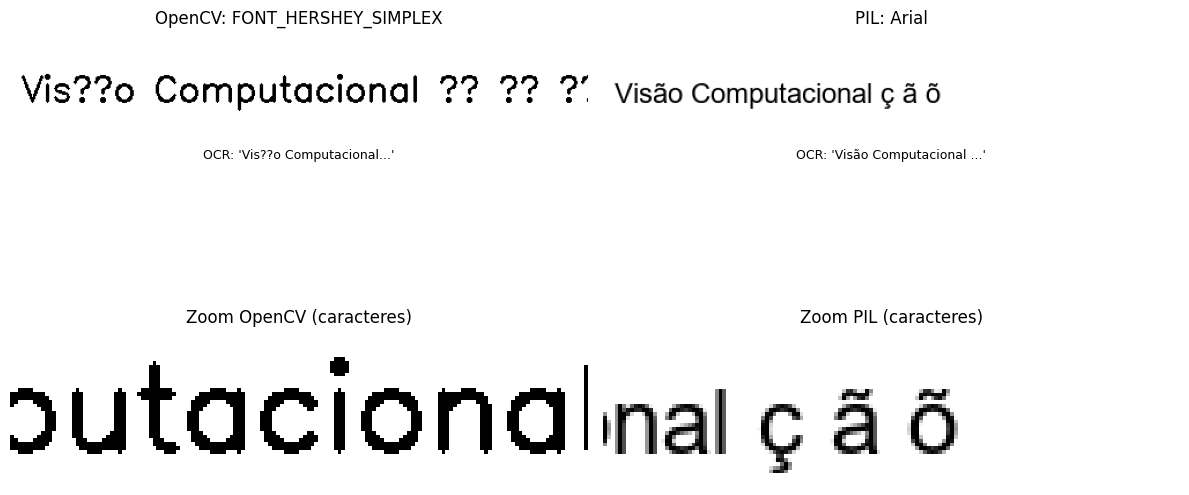


📊 RESULTADOS DA COMPARAÇÃO:
1. OpenCV: 'Vis??o Computacional 2? 2?'
2. PIL (Arial): 'Visão Computacional ç à 6'

💡 CONCLUSÃO: PIL com fonte adequada reconhece caracteres portugueses!


In [10]:
print("\n🔄 COMPARAÇÃO: OPENCV vs PIL")
print("=" * 60)

# Texto de exemplo
texto_teste = "Visão Computacional ç ã õ"

# Método 1: OpenCV
img_opencv = np.ones((100, 500, 3), dtype=np.uint8) * 255
cv2.putText(img_opencv, texto_teste, (10, 60), 
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Método 2: PIL
img_pil = Image.new('RGB', (500, 100), color='white')
draw = ImageDraw.Draw(img_pil)
try:
    font = ImageFont.truetype("arial.ttf", 24)
    fonte_usada = "Arial"
except:
    font = ImageFont.load_default()
    fonte_usada = "Padrão"

draw.text((10, 40), texto_teste, fill='black', font=font)

# Converter PIL para array para exibição
img_pil_array = np.array(img_pil)

# Testar OCR em ambas
texto_opencv = pytesseract.image_to_string(
    Image.fromarray(cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB)), 
    lang='por'
)
texto_pil = pytesseract.image_to_string(img_pil, lang='por')

# Mostrar resultados
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('OpenCV: FONT_HERSHEY_SIMPLEX')
axes[0, 0].axis('off')
axes[0, 0].text(0.5, -0.1, f"OCR: '{texto_opencv.strip()[:20]}...'", 
                transform=axes[0, 0].transAxes, ha='center', fontsize=9)

axes[0, 1].imshow(img_pil_array)
axes[0, 1].set_title(f'PIL: {fonte_usada}')
axes[0, 1].axis('off')
axes[0, 1].text(0.5, -0.1, f"OCR: '{texto_pil.strip()[:20]}...'", 
                transform=axes[0, 1].transAxes, ha='center', fontsize=9)

# Zoom nos caracteres especiais
axes[1, 0].imshow(cv2.cvtColor(img_opencv[30:70, 200:350], cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Zoom OpenCV (caracteres)')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_pil_array[30:70, 200:350])
axes[1, 1].set_title('Zoom PIL (caracteres)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n📊 RESULTADOS DA COMPARAÇÃO:")
print(f"1. OpenCV: '{texto_opencv.strip()}'")
print(f"2. PIL ({fonte_usada}): '{texto_pil.strip()}'")
print(f"\n💡 CONCLUSÃO: PIL com fonte adequada reconhece caracteres portugueses!")

### Pipeline Simples Eficaz


🔄 PIPELINE SIMPLES EFICAZ


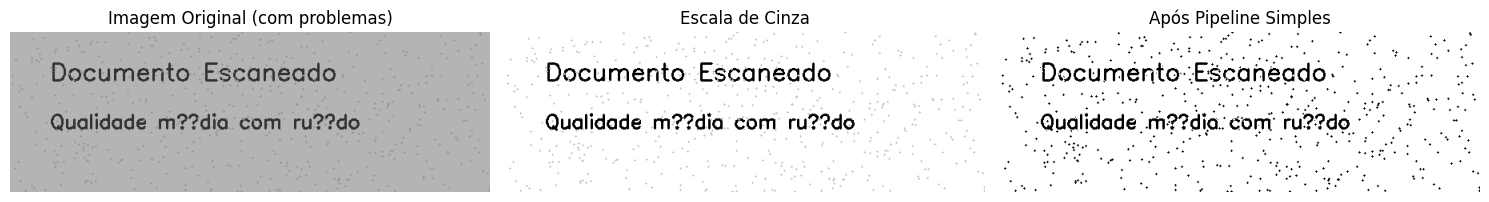

✅ Pipeline simples aplicado:
1. CLAHE para contraste
2. Binarização adaptativa
3. Garantir texto preto/fundo branco


In [11]:
print("\n🔄 PIPELINE SIMPLES EFICAZ")
print("=" * 60)

def pipeline_ocr_simples(imagem):
    """
    Pipeline otimizado para OCR de texto claro em fundo claro/escuro
    Retorna imagem binária pronta para OCR
    """
    # Converter para escala de cinza se for colorida
    if len(imagem.shape) == 3:
        gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    else:
        gray = imagem.copy()
    
    # 1. Aumentar contraste com CLAHE (funciona bem para texto)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    
    # 2. Binarização adaptativa (melhor para iluminação irregular)
    binary = cv2.adaptiveThreshold(enhanced, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)
    
    # 3. Garantir que texto seja preto em fundo branco
    # (Tesseract funciona melhor assim)
    if np.sum(binary == 0) > np.sum(binary == 255):
        binary = cv2.bitwise_not(binary)
    
    return binary

# Criar imagem de teste realista
img_teste = np.ones((200, 600, 3), dtype=np.uint8) * 180  # Cinza médio

# Adicionar texto simulado
cv2.putText(img_teste, "Documento Escaneado", (50, 60), 
            cv2.FONT_HERSHEY_SIMPLEX, 1, (50, 50, 50), 2)
cv2.putText(img_teste, "Qualidade média com ruído", (50, 120), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (50, 50, 50), 2)

# Adicionar ruído
for _ in range(500):
    x, y = np.random.randint(0, 600), np.random.randint(0, 200)
    cv2.circle(img_teste, (x, y), 1, (150, 150, 150), -1)

# Aplicar pipeline
img_processada = pipeline_ocr_simples(img_teste)

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(img_teste, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagem Original (com problemas)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_teste, cv2.COLOR_BGR2GRAY), cmap='gray')
axes[1].set_title('Escala de Cinza')
axes[1].axis('off')

axes[2].imshow(img_processada, cmap='gray')
axes[2].set_title('Após Pipeline Simples')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("✅ Pipeline simples aplicado:")
print("1. CLAHE para contraste")
print("2. Binarização adaptativa")
print("3. Garantir texto preto/fundo branco")

### Testar Pipeline com OCR

In [12]:
print("\n🧪 TESTE DO PIPELINE COM OCR")
print("=" * 60)

# Criar imagem de teste com PIL (com caracteres portugueses)
img_pil_teste = Image.new('RGB', (500, 200), color=(240, 240, 240))  # Cinza claro
draw_teste = ImageDraw.Draw(img_pil_teste)

try:
    font_teste = ImageFont.truetype("arial.ttf", 24)
except:
    font_teste = ImageFont.load_default()

# Texto com caracteres portugueses
textos = [
    ("Documento de Teste OCR", 50, 30, 'black'),
    ("Caracteres Portugueses: ç ã õ á é í ó ú", 50, 70, 'blue'),
    ("Reconhecimento de Texto Automático", 50, 110, 'black'),
    ("Pré-processamento é essencial", 50, 150, 'red'),
]

for texto, x, y, cor in textos:
    draw_teste.text((x, y), texto, fill=cor, font=font_teste)

# Converter para OpenCV
img_cv_teste = cv2.cvtColor(np.array(img_pil_teste), cv2.COLOR_RGB2BGR)

# Aplicar pipeline
img_pipeline = pipeline_ocr_simples(img_cv_teste)

# Testar OCR em três versões
resultados = []

# 1. Original (PIL)
img_pil_original = img_pil_teste
texto_original = pytesseract.image_to_string(img_pil_original, lang='por', config='--psm 6')
resultados.append(('Original (PIL)', texto_original))

# 2. OpenCV (convertida)
img_cv_original = Image.fromarray(cv2.cvtColor(img_cv_teste, cv2.COLOR_BGR2RGB))
texto_cv = pytesseract.image_to_string(img_cv_original, lang='por', config='--psm 6')
resultados.append(('OpenCV (convertida)', texto_cv))

# 3. Após pipeline
img_pil_processada = Image.fromarray(img_pipeline)
texto_processado = pytesseract.image_to_string(img_pil_processada, lang='por', config='--psm 6')
resultados.append(('Após Pipeline', texto_processado))

# Mostrar comparação
print("\n📊 COMPARAÇÃO DE RESULTADOS:")
for nome, texto in resultados:
    print(f"\n{nome}:")
    print("-" * 40)
    linhas = [linha for linha in texto.split('\n') if linha.strip()]
    for linha in linhas[:3]:  # Mostrar apenas 3 linhas
        print(f"  {linha[:50]}...")
    print(f"  Total linhas: {len(linhas)}")

# Verificar caracteres portugueses
print("\n🔤 VERIFICAÇÃO DE CARACTERES PORTUGUESES:")
caracteres_verificar = ['ç', 'ã', 'õ', 'á', 'é', 'í', 'ó', 'ú']

for nome, texto in resultados:
    encontrados = []
    for char in caracteres_verificar:
        if char in texto.lower():
            encontrados.append(char)
    
    if encontrados:
        print(f"✅ {nome}: {len(encontrados)} caracteres - {', '.join(encontrados[:3])}...")
    else:
        print(f"❌ {nome}: Nenhum caractere especial reconhecido")


🧪 TESTE DO PIPELINE COM OCR

📊 COMPARAÇÃO DE RESULTADOS:

Original (PIL):
----------------------------------------
  Documento de Teste OCR...
  Caracteres Portugueses: cçãdáéióuú...
  Reconhecimento de Texto Automático...
  Total linhas: 4

OpenCV (convertida):
----------------------------------------
  Documento de Teste OCR...
  Caracteres Portugueses: cçãdáéióuú...
  Reconhecimento de Texto Automático...
  Total linhas: 4

Após Pipeline:
----------------------------------------
  Documento de Teste OCR...
  Caracteres Portugueses: cã dá éióuú...
  Reconhecimento de Texto Automático...
  Total linhas: 4

🔤 VERIFICAÇÃO DE CARACTERES PORTUGUESES:
✅ Original (PIL): 6 caracteres - ç, ã, á...
✅ OpenCV (convertida): 6 caracteres - ç, ã, á...
✅ Após Pipeline: 5 caracteres - ã, á, é...


### Configurações do Tesseract que Funcionam

In [13]:
print("\n⚙️ CONFIGURAÇÕES OTIMIZADAS DO TESSERACT")
print("=" * 60)

print("""
AS MELHORES CONFIGURAÇÕES PARA PORTUGUÊS:

1. PAGE SEGMENTATION MODES (PSM):
   --psm 3: Segmentação automática (padrão)
   --psm 6: Assume bloco único de texto uniforme ← MELHOR para documentos
   --psm 7: Linha única
   --psm 8: Palavra única

2. CONFIGURAÇÕES ÚTEIS:
   -c preserve_interword_spaces=1   # Preserva espaços entre palavras
   -c tessedit_char_whitelist=...   # Lista de caracteres permitidos
   -c tessedit_char_blacklist=...   # Lista de caracteres proibidos

3. PARA CARACTERES PORTUGUESES:
   Usar lang='por' e garantir que por.traineddata está instalado
""")

# Testar diferentes PSMs
print("\n🧪 TESTE DE DIFERENTES PSMs:")

img_teste_psm = Image.new('RGB', (400, 100), color='white')
draw_psm = ImageDraw.Draw(img_teste_psm)
try:
    font_psm = ImageFont.truetype("arial.ttf", 24)
except:
    font_psm = ImageFont.load_default()

draw_psm.text((50, 40), "Visão Computacional 123", fill='black', font=font_psm)

psms = [
    (3, "PSM 3: Automático"),
    (6, "PSM 6: Bloco único"),
    (7, "PSM 7: Linha única"),
    (8, "PSM 8: Palavra única"),
]

for psm_num, psm_desc in psms:
    config = f'--psm {psm_num}'
    try:
        texto = pytesseract.image_to_string(img_teste_psm, lang='por', config=config)
        linhas = [l for l in texto.split('\n') if l.strip()]
        print(f"\n{psm_desc}:")
        print(f"  Linhas reconhecidas: {len(linhas)}")
        if linhas:
            print(f"  Exemplo: '{linhas[0][:30]}...'")
    except Exception as e:
        print(f"\n{psm_desc}: Erro - {str(e)[:50]}")

print(f"\n💡 RECOMENDAÇÃO: Use --psm 6 para documentos limpos")


⚙️ CONFIGURAÇÕES OTIMIZADAS DO TESSERACT

AS MELHORES CONFIGURAÇÕES PARA PORTUGUÊS:

1. PAGE SEGMENTATION MODES (PSM):
   --psm 3: Segmentação automática (padrão)
   --psm 6: Assume bloco único de texto uniforme ← MELHOR para documentos
   --psm 7: Linha única
   --psm 8: Palavra única

2. CONFIGURAÇÕES ÚTEIS:
   -c preserve_interword_spaces=1   # Preserva espaços entre palavras
   -c tessedit_char_whitelist=...   # Lista de caracteres permitidos
   -c tessedit_char_blacklist=...   # Lista de caracteres proibidos

3. PARA CARACTERES PORTUGUESES:
   Usar lang='por' e garantir que por.traineddata está instalado


🧪 TESTE DE DIFERENTES PSMs:

PSM 3: Automático:
  Linhas reconhecidas: 1
  Exemplo: 'Visão Computacional 123...'

PSM 6: Bloco único:
  Linhas reconhecidas: 1
  Exemplo: 'Visão Computacional 123...'

PSM 7: Linha única:
  Linhas reconhecidas: 1
  Exemplo: 'Visão Computacional 123...'

PSM 8: Palavra única:
  Linhas reconhecidas: 1
  Exemplo: 'nc...'

💡 RECOMENDAÇÃO: Use --psm 6

### Exercício Prático Guiado

In [14]:
print("\n💪 EXERCÍCIO PRÁTICO GUIADO")
print("=" * 60)

print("""
CRIE UMA IMAGEM OIMIZADA PARA OCR:

Siga estes passos:

1. USE PIL (não OpenCV) para criar o texto
2. USE FONTE com caracteres portugueses (Arial, Times)
3. MANTENHA contraste alto (preto no branco)
4. SALVE como PNG (alta qualidade)
5. USE configuração otimizada do Tesseract

EXEMPLO DE CÓDIGO:
""")


💪 EXERCÍCIO PRÁTICO GUIADO

CRIE UMA IMAGEM OIMIZADA PARA OCR:

Siga estes passos:

1. USE PIL (não OpenCV) para criar o texto
2. USE FONTE com caracteres portugueses (Arial, Times)
3. MANTENHA contraste alto (preto no branco)
4. SALVE como PNG (alta qualidade)
5. USE configuração otimizada do Tesseract

EXEMPLO DE CÓDIGO:



In [16]:
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import os

# 1. Configurar Tesseract
tesseract_path = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
if os.path.exists(tesseract_path):
    pytesseract.pytesseract.tesseract_cmd = tesseract_path

# 2. Criar imagem com PIL
img = Image.new('RGB', (600, 400), color='white')
draw = ImageDraw.Draw(img)

# 3. Usar fonte com caracteres portugueses
try:
    font = ImageFont.truetype("arial.ttf", 28)
    print("✅ Usando fonte Arial")
except:
    font = ImageFont.load_default()
    print("⚠️  Usando fonte padrão")

# 4. Adicionar texto
textos = [
    ("SEU NOME: João Silva", 50, 50),
    ("CURSO: Especialista em IA", 50, 100),
    ("MÓDULO: Visão Computacional", 50, 150),
    ("CARACTERES: ç ã õ á é í ó ú", 50, 200),
    ("NOTA FINAL: 10/10", 50, 250),
    ("PRÓXIMO: Pré-processamento", 50, 300),
]

for texto, x, y in textos:
    draw.text((x, y), texto, fill='black', font=font)

# 5. Salvar
img.save("meu_documento_otimizado.png")
print("✅ Imagem salva: meu_documento_otimizado.png")

# 6. Aplicar OCR com configuração otimizada
texto_reconhecido = pytesseract.image_to_string(
    img, 
    lang='por', 
    config='--psm 6 -c preserve_interword_spaces=1'
)

print(f"\\n📝 TEXTO RECONHECIDO:")
print("-" * 40)
print(texto_reconhecido)
print("-" * 40)

# 7. Verificar caracteres especiais
if any(char in texto_reconhecido.lower() for char in ['ç', 'ã', 'õ']):
    print("✅ Caracteres portugueses reconhecidos!")
else:
    print("⚠️  Caracteres portugueses não reconhecidos")

print("\nDESAFIO: Execute este código e compare com seu resultado anterior!")

✅ Usando fonte Arial
✅ Imagem salva: meu_documento_otimizado.png
\n📝 TEXTO RECONHECIDO:
----------------------------------------
SEU NOME: João Silva
CURSO: Especialista em IA
MÓDULO: Visão Computacional
CARACTERES: cçádáéióú
NOTA FINAL: 10/10

PRÓXIMO: Pré-processamento

----------------------------------------
✅ Caracteres portugueses reconhecidos!

DESAFIO: Execute este código e compare com seu resultado anterior!


### Resumo e Próximos Passos

In [17]:
print("\n" + "=" * 60)
print("🎯 RESUMO E PRÓXIMOS PASSOS")
print("=" * 60)

print("""
✅ LIÇÕES APRENDIDAS:

1. PROBLEMA IDENTIFICADO:
   • OpenCV FONT_HERSHEY_SIMPLEX não tem caracteres portugueses
   • Caracteres ç, ã, õ aparecem como ??

2. SOLUÇÃO ENCONTRADA:
   • Usar PIL em vez de OpenCV para criar texto
   • Usar fontes como Arial, Times New Roman
   • Configuração Tesseract: --psm 6

3. PIPELINE EFICAZ:
   • CLAHE para contraste
   • Binarização adaptativa
   • Texto preto em fundo branco

🎯 PRÓXIMOS PASSOS:

1. Recrie sua imagem do Notebook 01 usando PIL
2. Teste diferentes configurações do Tesseract
3. Compare os resultados antes/depois
4. Quando estiver satisfeito, prossiga para Notebook 03

📚 PARA NOTEBOOK 03 (DOCUMENTOS REAIS):
• Processamento de PDFs
• Extração de tabelas
• Validação de dados
• Casos práticos do mundo real
""")

print("\n" + "=" * 60)
print("✅ NOTEBOOK 02 COMPLETO!")
print("=" * 60)


🎯 RESUMO E PRÓXIMOS PASSOS

✅ LIÇÕES APRENDIDAS:

1. PROBLEMA IDENTIFICADO:
   • OpenCV FONT_HERSHEY_SIMPLEX não tem caracteres portugueses
   • Caracteres ç, ã, õ aparecem como ??

2. SOLUÇÃO ENCONTRADA:
   • Usar PIL em vez de OpenCV para criar texto
   • Usar fontes como Arial, Times New Roman
   • Configuração Tesseract: --psm 6

3. PIPELINE EFICAZ:
   • CLAHE para contraste
   • Binarização adaptativa
   • Texto preto em fundo branco

🎯 PRÓXIMOS PASSOS:

1. Recrie sua imagem do Notebook 01 usando PIL
2. Teste diferentes configurações do Tesseract
3. Compare os resultados antes/depois
4. Quando estiver satisfeito, prossiga para Notebook 03

📚 PARA NOTEBOOK 03 (DOCUMENTOS REAIS):
• Processamento de PDFs
• Extração de tabelas
• Validação de dados
• Casos práticos do mundo real


✅ NOTEBOOK 02 COMPLETO!


### Código de Teste Rápido

In [19]:
print("\n⚡ CÓDIGO DE TESTE RÁPIDO")
print("=" * 60)

print('''```python
# Teste rápido para verificar se o problema foi resolvido
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import os

# Configurar
tesseract_path = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
if os.path.exists(tesseract_path):
    pytesseract.pytesseract.tesseract_cmd = tesseract_path
    
    # Criar imagem teste
    img = Image.new('RGB', (400, 150), 'white')
    draw = ImageDraw.Draw(img)
    
    # Tentar fonte Arial
    try:
        font = ImageFont.truetype("arial.ttf", 28)
        print("✅ Teste: Usando fonte Arial")
    except:
        font = ImageFont.load_default()
        print("⚠️  Teste: Usando fonte padrão")
    
    # Texto com caracteres problemáticos
    draw.text((50, 50), "Problema: ç ã õ", fill='red', font=font)
    draw.text((50, 100), "Solução: PIL + Arial", fill='green', font=font)
    
    # OCR
    texto = pytesseract.image_to_string(img, lang='por', config='--psm 6')
    
    print(f"\\n📝 Resultado do teste:")
    print("-" * 40)
    print(texto)
    print("-" * 40)
    
    # Verificar
    if 'ç' in texto.lower() or 'ã' in texto.lower() or 'õ' in texto.lower():
        print("🎉 PROBLEMA RESOLVIDO! Caracteres reconhecidos.")
    else:
        print("⚠️  Problema persistente.")
else:
    print("❌ Tesseract não encontrado")
```''')

print("\n🔧 Execute este teste rápido para verificar a solução!")


⚡ CÓDIGO DE TESTE RÁPIDO
```python
# Teste rápido para verificar se o problema foi resolvido
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import os

# Configurar
tesseract_path = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
if os.path.exists(tesseract_path):
    pytesseract.pytesseract.tesseract_cmd = tesseract_path

    # Criar imagem teste
    img = Image.new('RGB', (400, 150), 'white')
    draw = ImageDraw.Draw(img)

    # Tentar fonte Arial
    try:
        font = ImageFont.truetype("arial.ttf", 28)
        print("✅ Teste: Usando fonte Arial")
    except:
        font = ImageFont.load_default()
        print("⚠️  Teste: Usando fonte padrão")

    # Texto com caracteres problemáticos
    draw.text((50, 50), "Problema: ç ã õ", fill='red', font=font)
    draw.text((50, 100), "Solução: PIL + Arial", fill='green', font=font)

    # OCR
    texto = pytesseract.image_to_string(img, lang='por', config='--psm 6')

    print(f"\n📝 Resultado do teste:")
    print("-" * 4